# Loading Raw Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv("dataset.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.shape

(45211, 11)

# Data Cleaning

In [5]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

## Checking for null values

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There is no null values in the dataset.

## Checking for duplicated data

In [7]:
df.duplicated().sum()

6

In [8]:
dup = df[df.duplicated()]
dup

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [9]:
df.drop_duplicates()
df.info

<bound method DataFrame.info of        age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       

## Checking for outliers

In [10]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


We will check for Outliers again after EDA.

# Exploratory Data Analysis

## Yes or No

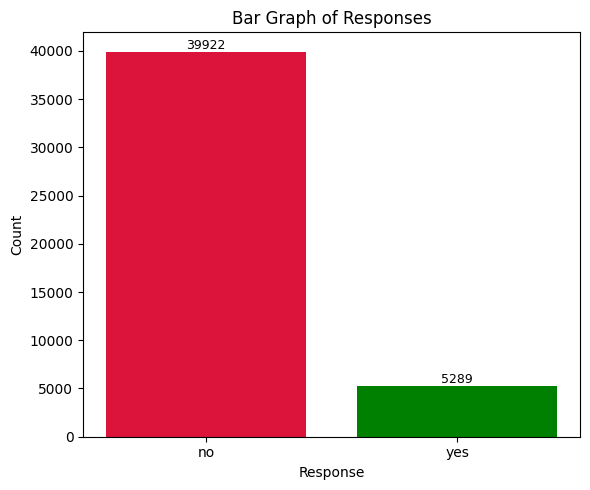

In [18]:
counts = df['y'].value_counts()
plt.figure(figsize=(6, 5))
colors = ['green' if response == 'yes' else 'crimson' for response in counts.index]
bars = plt.bar(counts.index, counts.values, color = colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), ha='center', va='bottom', fontsize=9)

plt.title('Bar Graph of Responses')
plt.xlabel('Response')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

In [19]:
counts = df['y'].value_counts()
print("Percent -")
counts/len(df)*100

Percent -


y
no     88.30152
yes    11.69848
Name: count, dtype: float64

**The class distribution in the target variable is approximately 88:12, pointing to an imbalanced dataset.**

## Job

In [21]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

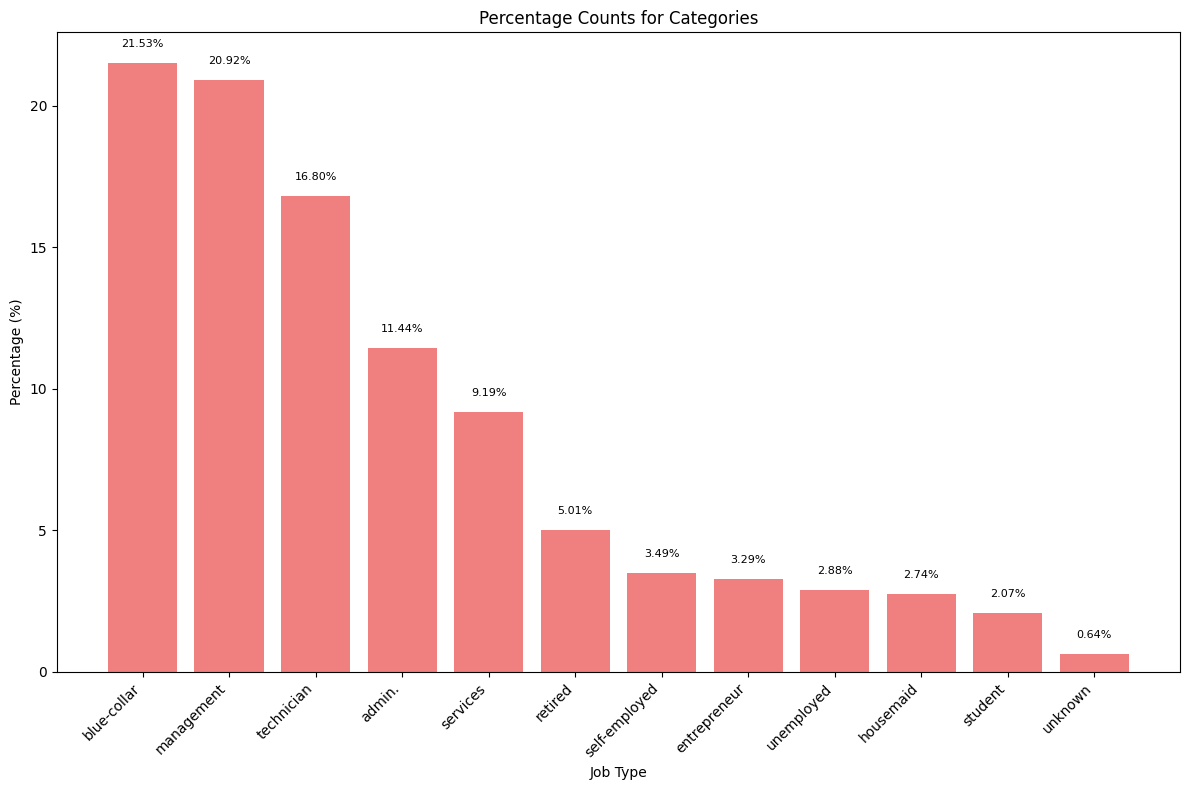

In [56]:
category_counts = df['job'].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
plt.figure(figsize=(12, 8))
bars = plt.bar(category_counts.index, percentages.values, color='lightcoral')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Categories')
plt.xlabel('Job Type')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

## Marital Status

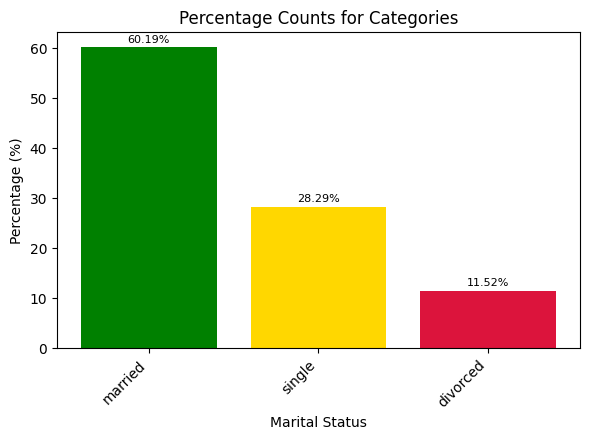

In [57]:
category_counts = df['marital'].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
plt.figure(figsize=(6, 4.5))
colors = ['green' if response == 'married' else 'gold' if response == 'single' else 'crimson' for response in category_counts.index]
bars = plt.bar(category_counts.index, percentages.values, color = colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Categories')
plt.xlabel('Marital Status')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

## Education Qualification

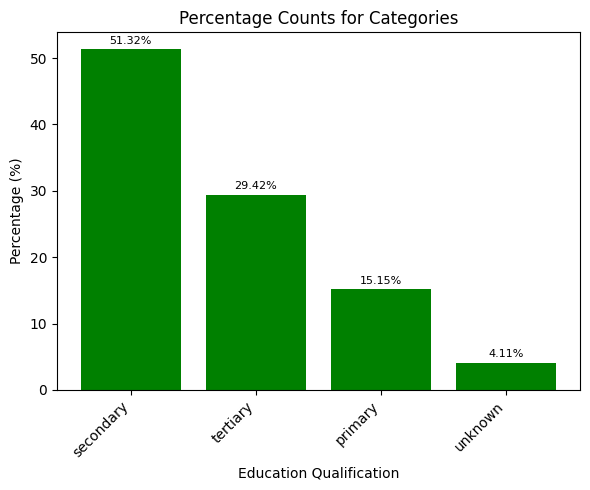

In [58]:
category_counts = df['education_qual'].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
plt.figure(figsize=(6, 5))
bars = plt.bar(category_counts.index, percentages.values, color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Categories')
plt.xlabel('Education Qualification')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Call Type

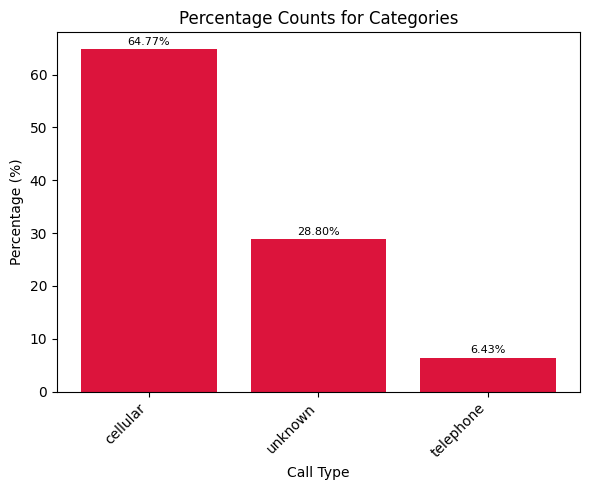

In [63]:
category_counts = df['call_type'].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
plt.figure(figsize=(6, 5))
bars = plt.bar(category_counts.index, percentages.values, color='crimson')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Categories')
plt.xlabel('Call Type')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

## Month

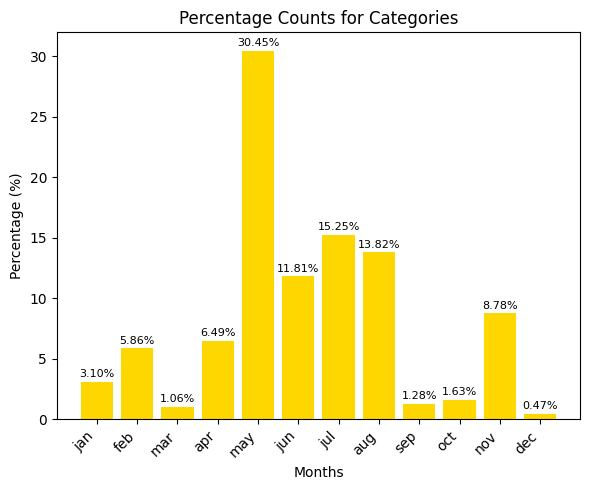

In [61]:
category_counts = df['mon'].value_counts()
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
category_counts = category_counts.reindex(month_order, fill_value=0)
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
plt.figure(figsize=(6, 5))
bars = plt.bar(category_counts.index, percentages.values, color='gold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, f'{yval:.2f}%', ha='center', va='bottom', fontsize=8)

plt.title('Percentage Counts for Categories')
plt.xlabel('Months')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


## Observation

- **Top 3 categoroes of jobs - Blue collar, Management and Technician**
- **More than 60% are married.**
- **More than 50% of customers belong to secondary education qualification.**
- **About 2/3rd of customers were contacted through Cellular Call.**
- **About 30% customers were contacted in the month of May.**
- **Only 12% of customers contacted were converted.**
- **The class distribution in the target variable is approximately 88:12, pointing to an imbalanced dataset.**

In [72]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)

**The missing values in some columns have been represented as unknown. unknown represents missing data.**
**Unknown Values are replaced by the respective mode values.**

## Numerical Columns

C:\Users\abhij\AppData\Local\Temp\ipykernel_9168\652913866.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age, kde=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_9168\652913866.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.day, kde=True)


<Axes: xlabel='day', ylabel='Density'>

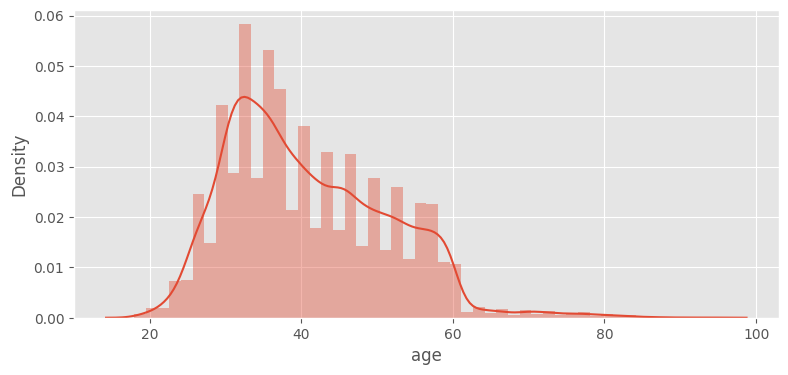

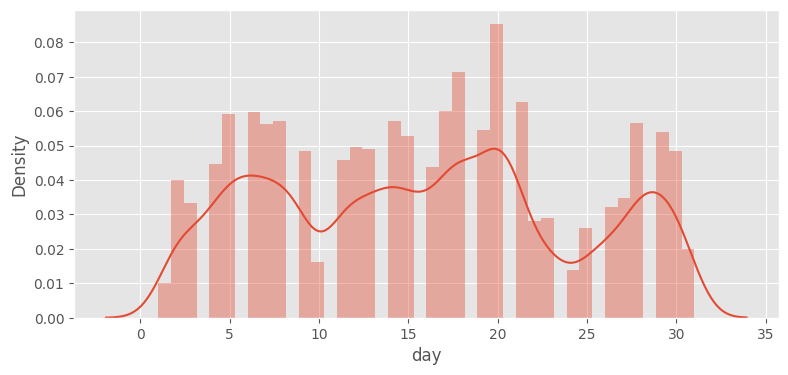

In [84]:
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df.age, kde=True)

plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df.day, kde=True)

C:\Users\abhij\AppData\Local\Temp\ipykernel_9168\121892469.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.dur, kde=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_9168\121892469.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.num_calls, kde=True)


<Axes: xlabel='num_calls', ylabel='Density'>

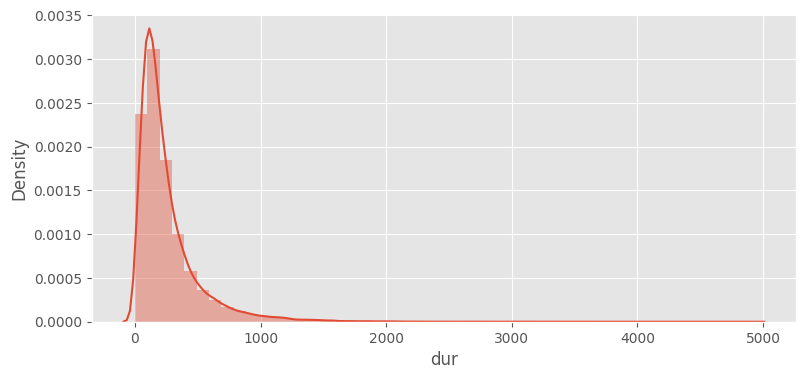

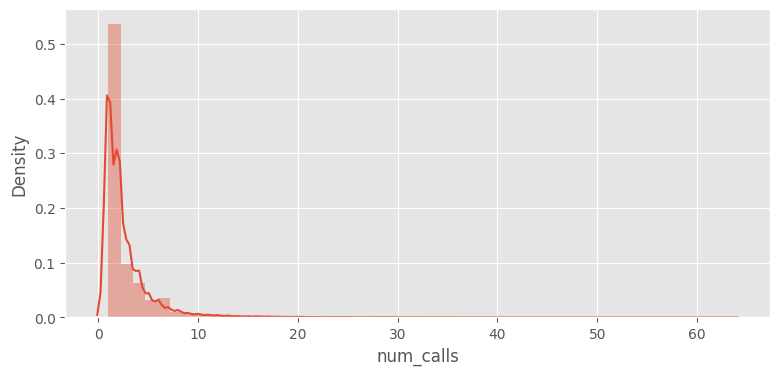

In [85]:
plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df.dur, kde=True)

plt.style.use("ggplot")
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.distplot(df.num_calls, kde=True)

- **The features age, dur and num_calls are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.**
- **Looking at the plot for num_calls, we can infer that majority of the customers were being contacted for the first or second time time.**

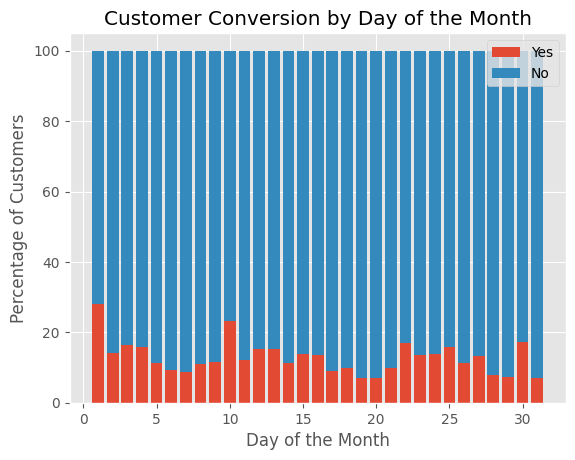

In [86]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']

plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day of the Month')
plt.ylabel('Percentage of Customers')
plt.title('Customer Conversion by Day of the Month')
plt.legend()
plt.show()

**From above plot we can see 1,10,30 dates are when customer said yes most**

# Bivariate Analysis of Categorical Columns

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\884561182.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\884561182.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


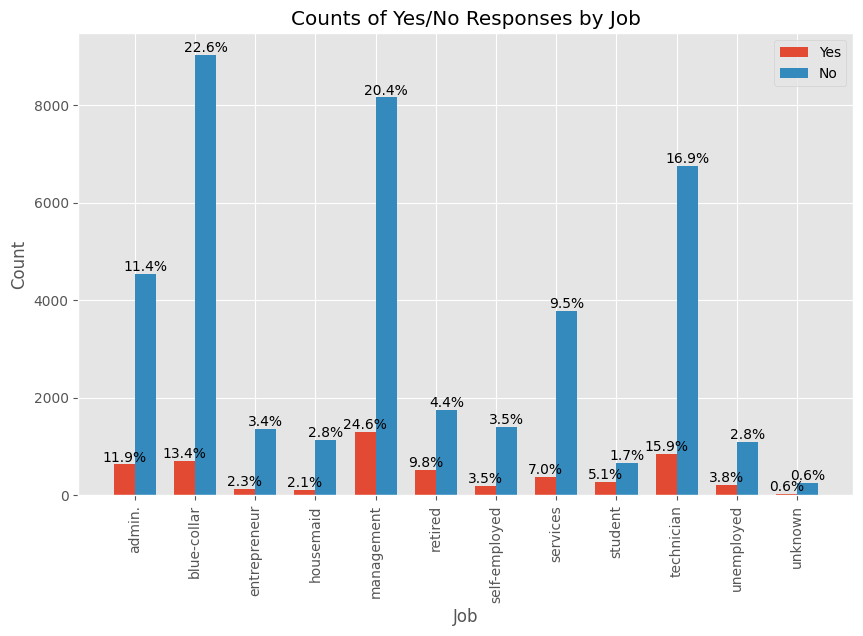

In [14]:
cat_var = ['job']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\825750525.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\825750525.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


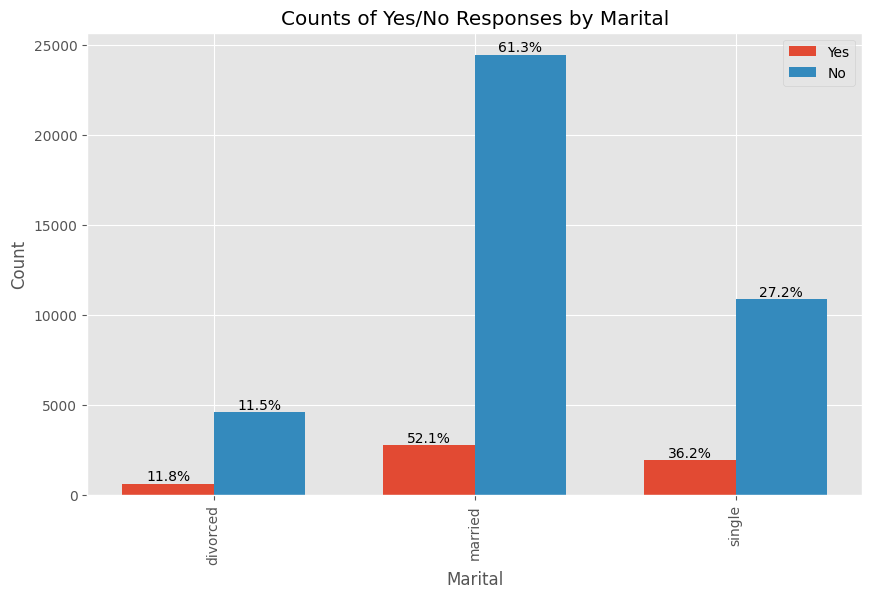

In [15]:
cat_var = ['marital']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\2642364980.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\2642364980.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


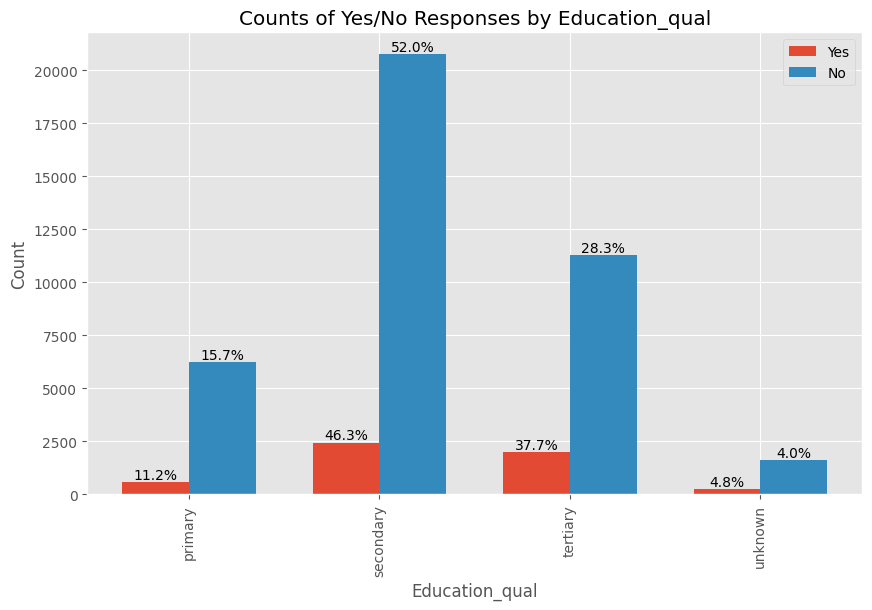

In [16]:
cat_var = ['education_qual']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\1570540034.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\1570540034.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


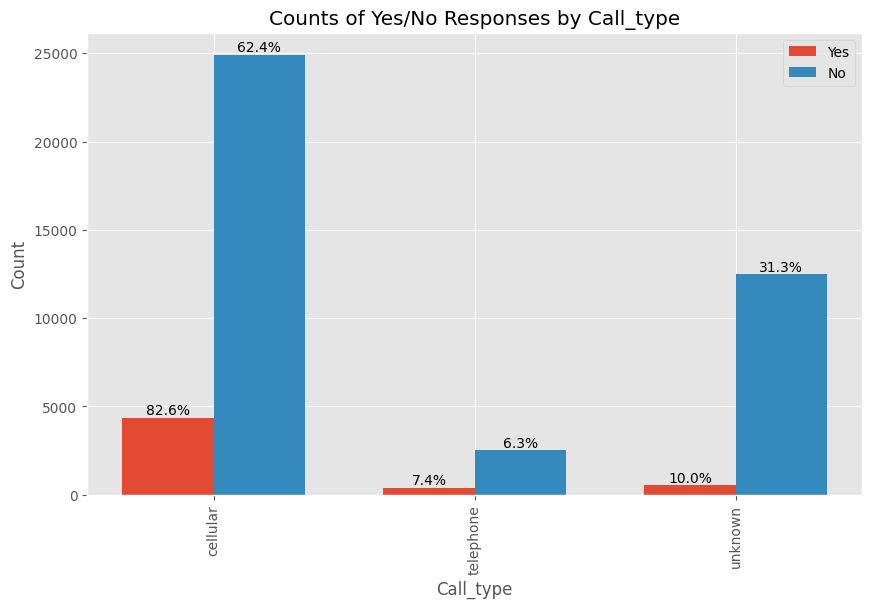

In [17]:
cat_var = ['call_type']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\525947055.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\525947055.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


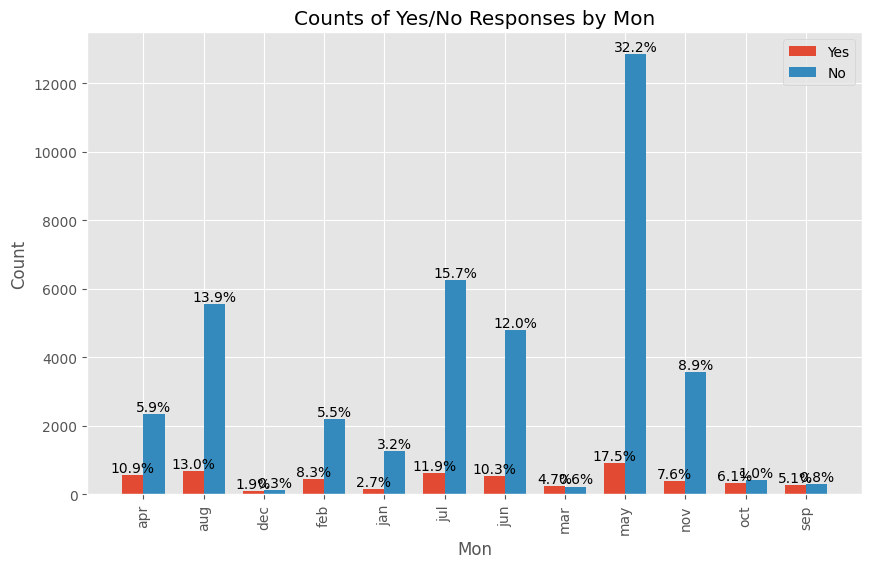

In [18]:
cat_var = ['mon']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\2540039502.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
C:\Users\abhij\AppData\Local\Temp\ipykernel_28600\2540039502.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')


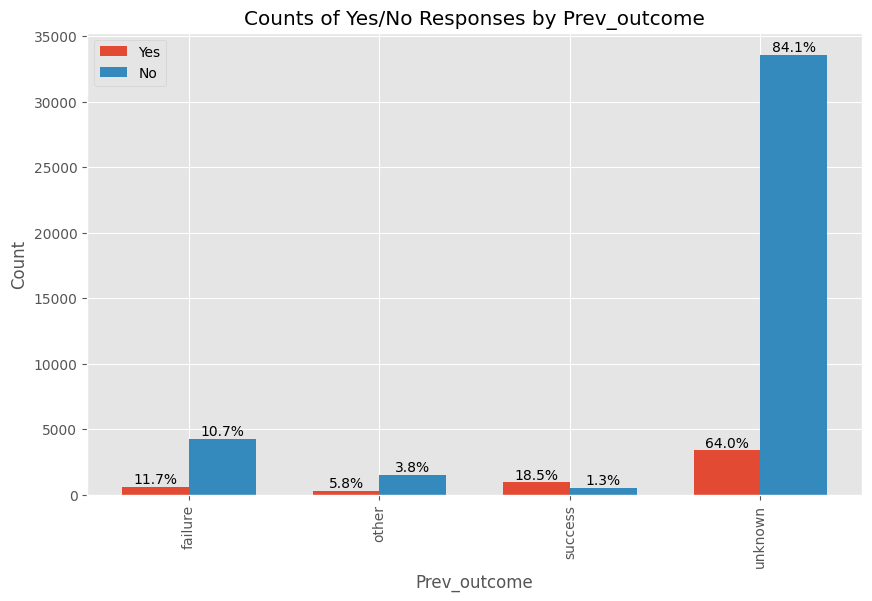

In [19]:
cat_var = ['prev_outcome']
plt.style.use("ggplot")

for column in cat_var:
    category_counts = df.groupby([column, 'y']).size().unstack(fill_value=0)
    
    total_yes = category_counts['yes'].sum()
    total_no = category_counts['no'].sum()
    
    percent_yes_total = (category_counts['yes'] / total_yes) * 100
    percent_no_total = (category_counts['no'] / total_no) * 100
    
    fig, ax = plt.subplots(figsize=(10, 6))

    positions = np.arange(len(category_counts))
    width = 0.35

    bars1 = ax.bar(positions - width/2, category_counts['yes'], width, label='Yes')
    bars2 = ax.bar(positions + width/2, category_counts['no'], width, label='No')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Yes/No Responses by {column.capitalize()}')
    ax.set_xticks(positions)
    ax.set_xticklabels(category_counts.index)
    ax.legend()

    for i in range(len(category_counts)):
        ax.text(positions[i] - width/2, category_counts['yes'][i] + 0.05, f'{percent_yes_total[i]:.1f}%', ha='center', va='bottom')
        ax.text(positions[i] + width/2, category_counts['no'][i] + 0.05, f'{percent_no_total[i]:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()

## Observation
- **About 25% of converted customers has management jobs which are in majority.**
- **More than 50% of converted customers are married.**
- **Secondary education qualfied are converted most**
- **84% converted customers are either secondary or tertiary qualified.**
- **Cell-phones should be the preferred mode of contact for contacting customers.**
- **May month should be the prefered month to contact**
- **Previous Outcome of majority of converted customers is unknown.**

# Handling Outliers

In [37]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [38]:
lower_boundries= []
upper_boundries= []
for i in ["age", "dur", "day","num_calls"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound= df[i].quantile(0.25) - (1.5*IQR)
    upper_bound= df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

age : 10.5 , 70.5
dur : -221.0 , 643.0
day : -11.5 , 40.5
num_calls : -2.0 , 6.0


In [39]:
j = 0
for i in ["age", "dur", "day","num_calls"]:
    df.loc[df[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1  

In [40]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.862799,15.806419,234.939307,2.392228
std,10.379659,8.322476,176.749932,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.000000,31.000000,643.000000,6.000000


In [24]:
df.to_csv('final_policy.csv', index=False)